In [10]:
import cv2 as cv
import numpy as np
from scipy import linalg

In [11]:
video = cv.VideoCapture("/Users/nadaelarabi/MATH-494/montecarlolow.mp4")

In [12]:
frames = []
ret = True
while ret:
    ret,img = video.read()
    if ret:
        greyscale = np.mean(img,-1)
        frames.append(greyscale)
video2=np.stack(frames,axis=0)


In [13]:
video2.shape

(379, 540, 960)

In [14]:
#Now we reshape the matrix
dataMat=(np.reshape(video2,(379,518400))).transpose()

In [15]:
dataMat.shape

(518400, 379)

In [16]:
dataMat

array([[ 17.33333333,  18.33333333,  18.33333333, ...,  25.        ,
         25.        ,  25.        ],
       [ 17.33333333,  18.33333333,  18.33333333, ...,  25.        ,
         25.        ,  25.        ],
       [ 17.33333333,  18.33333333,  18.33333333, ...,  26.        ,
         26.        ,  26.        ],
       ...,
       [167.66666667, 167.66666667, 167.66666667, ..., 163.66666667,
        163.66666667, 163.66666667],
       [164.66666667, 164.66666667, 164.66666667, ..., 163.66666667,
        163.66666667, 163.66666667],
       [163.66666667, 162.66666667, 162.66666667, ..., 163.66666667,
        163.66666667, 163.66666667]])

In [17]:
dataMat[0:165,0:380]

array([[17.33333333, 18.33333333, 18.33333333, ..., 25.        ,
        25.        , 25.        ],
       [17.33333333, 18.33333333, 18.33333333, ..., 25.        ,
        25.        , 25.        ],
       [17.33333333, 18.33333333, 18.33333333, ..., 26.        ,
        26.        , 26.        ],
       ...,
       [25.        , 25.        , 25.        , ..., 30.33333333,
        30.33333333, 30.33333333],
       [25.        , 25.        , 25.        , ..., 30.33333333,
        30.33333333, 30.33333333],
       [25.        , 25.        , 25.        , ..., 35.        ,
        36.        , 36.        ]])

In [18]:
data = dataMat.astype('uint8')

In [19]:
u,s,vt = np.linalg.svd(data,full_matrices=False)

In [20]:
u.shape

(518400, 379)

In [230]:
u

array([[-2.07725113e-04,  1.28399575e-04,  2.91100830e-04, ...,
        -1.00926437e-04,  1.32841002e-03,  2.09932587e-03],
       [-3.22342353e-04,  1.27958516e-03,  3.37546854e-03, ...,
         1.79262456e-03,  2.61294966e-03,  1.11322944e-03],
       [ 2.64452428e-03, -1.44306832e-03, -1.51990539e-04, ...,
         1.36163094e-04,  1.45426950e-04, -1.97014668e-04],
       ...,
       [ 1.19118950e-04,  1.43315678e-04, -1.32019426e-04, ...,
         1.07219800e-03,  8.80894026e-05, -3.28907101e-04],
       [-5.29045922e-04,  2.34236412e-05, -5.89174383e-05, ...,
        -2.95963024e-05,  1.05979246e-03, -5.14252085e-05],
       [ 2.81401480e-05,  1.02963803e-04,  9.22397196e-05, ...,
        -1.21637502e-03,  6.40855630e-04,  1.15597994e-03]])

In [21]:
#mat=np.matmul((u.transpose()),data)
#u = np.resize(u,(518400,165))
#u.shape


In [22]:
#Now we find the median value of the singular values
s
median = np.median(s)
print(median)

287.1981842540878


In [23]:
#s= np.diag(s)
#s

In [24]:
#Now we can compute tau, as per Gavish and Donoho, 2014
m = data.shape[0] #Here we are simply storing dimensions of rows, clomuns of X
n = data.shape[1]

beta = 1-(n/m)
omega = 0.56*(beta*beta*beta) - 0.95*(beta*beta) + 1.82*beta + 1.43
tau = omega*median
print(beta)
print(omega)
print(tau)

0.9992689043209877
2.8588306368803993
821.0509680020081


In [25]:
#Here we just determine how many singular values are important
counter = 0
i=0
while tau<s[i]:
    i=i+1
    counter=counter+1
    
print('The number of significant modes is:', counter)

The number of significant modes is: 165


In [26]:
#Since we only have 165 important modes, we should truncate our matrix U
u = np.resize(u,(518400,165))
u.shape


(518400, 165)

In [27]:
#Now we multiply U* by our data matrix to obtain our SxN matrix
data_reduced=np.matmul((u.transpose()),data)
data_reduced.shape
n = data_reduced.shape[1]

In [28]:
X = data_reduced[:,:n-1]
Y = data_reduced[:,1:n]

X.shape


(165, 378)

In [29]:
data_reduced.shape

(165, 379)

In [30]:
Y.shape

(165, 378)

In [31]:
#Now we can create our low rank matrix A
Xt = np.linalg.pinv(X)

In [32]:
A = np.matmul(Y,Xt)

In [33]:
A.shape

(165, 165)

In [34]:
A

array([[ 7.95661055e-01,  8.78821634e-01,  1.86879288e-01, ...,
         2.51588093e-01,  4.04757619e-01, -3.17917778e-01],
       [ 4.98197010e-02, -2.57978684e-03,  9.61023740e-01, ...,
        -2.89630528e-01, -1.12923333e+00, -5.60314433e-01],
       [ 6.98644345e-01,  1.30256327e-03,  6.21764516e-01, ...,
        -1.68820546e-01, -1.42600411e-01,  1.90360744e-02],
       ...,
       [ 6.32265812e-01,  3.11060098e-01,  1.10697637e-01, ...,
         3.86581879e-01, -4.12176819e-01, -3.98070196e-01],
       [-1.44844698e-02,  1.13001865e+00,  6.10207671e-01, ...,
         7.83738040e-01,  1.83442549e+00, -2.42271678e-01],
       [ 4.53921170e-02,  3.63099576e-01,  1.31712338e+00, ...,
         2.66364966e-01, -2.74048305e-01,  2.95041258e-01]])

In [35]:
#The DMD modes are the eigenvaectors, the W matrix, don't confuse yourself with the capital phi notation
#Now we can extract the eigenvalues and eigenvectors
W,V = np.linalg.eig(A)


In [36]:
#W

In [37]:
V

array([[-0.05176374+0.01076352j, -0.05176374-0.01076352j,
        -0.01243247+0.03860524j, ...,  0.06154313-0.04650707j,
         0.10712888+0.j        , -0.03519608+0.j        ],
       [-0.00472705-0.0073153j , -0.00472705+0.0073153j ,
         0.00218583-0.1194587j , ..., -0.07766361+0.0255596j ,
         0.0411518 +0.j        ,  0.12081767+0.j        ],
       [ 0.03281693+0.03426223j,  0.03281693-0.03426223j,
         0.06897886+0.01457434j, ...,  0.02525944+0.05134104j,
        -0.02745673+0.j        ,  0.01424761+0.j        ],
       ...,
       [ 0.02081806-0.05333419j,  0.02081806+0.05333419j,
         0.05268842-0.07821175j, ..., -0.04238819-0.03735626j,
        -0.04282375+0.j        ,  0.00046712+0.j        ],
       [-0.10572758-0.06503773j, -0.10572758+0.06503773j,
         0.01464041-0.02124197j, ...,  0.0609986 -0.05800961j,
         0.14110616+0.j        ,  0.06173814+0.j        ],
       [-0.04410814-0.03933681j, -0.04410814+0.03933681j,
        -0.02601038-0.04907704

In [38]:
V_inv = np.linalg.inv(V)

In [39]:
coefMat = np.matmul(V_inv,X[:,0])

In [40]:
#coefMat

In [41]:
#coefMat.reshape(165,1)
#W.reshape(165,1)

In [42]:
#Now let's construct the Eigen decomp matrix Zn

Zn = np.empty([165,379],dtype='complex')
#Zn.astype('complex')
arr = np.empty([165,1],dtype='complex')
#arr.astype('complex')

for n in range(379):
    for m in range(165):
        #print(V[:,m])
        arr = arr+(V[:,[m]]*coefMat[m]*(W[m])**(n+1))
    Zn[:,[n]]= arr
    #print(arr)
    arr = np.empty([165,1])

print(Zn)

[[  -9.78523327+4.50018454e-12j   -5.4434433 +5.42434018e-12j
    -1.06468737+4.82560502e-12j ...   -4.99555665+4.99621159e-10j
   -29.72492945+3.93489619e-10j  -54.24516389+2.69795462e-10j]
 [-147.77901794-2.68856683e-12j -138.33021663-6.61382750e-12j
  -129.1385131 -8.14711670e-12j ... -286.80319051-3.48483723e-10j
  -305.82415241-5.63190182e-10j -317.90309579-7.61578590e-10j]
 [  19.71362247+2.28192496e-12j   29.1815011 +6.23422990e-12j
    31.12873306+5.72808687e-12j ...  156.92689552+5.90630885e-10j
   143.94426068+5.93673780e-10j  128.06929264+5.74267526e-10j]
 ...
 [ -86.48153382+1.30375079e-12j  -82.43800517-2.79708973e-13j
   -78.79056125-3.85426550e-12j ... -183.96294929-1.03538421e-09j
  -159.2315295 -1.02715480e-09j -129.73224038-9.79569221e-10j]
 [   9.99072849-2.98500837e-12j   15.79346073-1.42984204e-12j
    17.77857404-1.15198424e-13j ...   10.55159556-4.65157552e-10j
    32.34404513-3.77627254e-10j   54.21511064-2.73569516e-10j]
 [-125.11023837-1.75413052e-13j -123.514

In [43]:
Zn[:,[0]]

array([[  -9.78523327+4.50018454e-12j],
       [-147.77901794-2.68856683e-12j],
       [  19.71362247+2.28192496e-12j],
       [-310.09541957+7.86677429e-12j],
       [   7.01582872-4.13215765e-14j],
       [ -38.3387268 +5.82979099e-12j],
       [-149.38430751-5.19235232e-12j],
       [ -94.18103733+1.21223544e-12j],
       [ -90.06491971-3.55116636e-12j],
       [  28.48408128+1.59668245e-11j],
       [-124.29085117+3.90277550e-12j],
       [ -87.21458168+4.93357047e-12j],
       [ -72.58751201+1.30531926e-12j],
       [ -88.68153056-5.98805131e-13j],
       [-201.66391462-6.74307693e-12j],
       [-116.13698742-2.39406937e-12j],
       [ -45.19647995+5.11303032e-12j],
       [-161.60615928+1.00147765e-11j],
       [  25.30178974+2.15533144e-12j],
       [-140.46040351+1.33112735e-12j],
       [-248.75836754-1.31696710e-12j],
       [-137.78113767+6.86115220e-12j],
       [-212.3534208 +3.12451215e-12j],
       [ -87.2422221 -3.59191880e-12j],
       [ 135.36519887-5.17504360e-12j],


In [44]:
print(Zn[:,[37]])

[[ -11.21306452-1.49266365e-11j]
 [-104.08440717+4.36445634e-12j]
 [  52.9055136 -1.47412533e-11j]
 [-271.13585321-1.76150297e-11j]
 [ -14.48021743+4.38733809e-12j]
 [ -13.10164455-5.40796527e-12j]
 [-104.00883068-1.78750611e-11j]
 [ -72.08825138-1.01231519e-11j]
 [ -68.75450863+1.17438586e-11j]
 [  49.20515173-1.07930611e-11j]
 [-129.56906432+8.77523794e-14j]
 [-107.3118167 +4.14029602e-13j]
 [ -41.88985561-1.39034227e-12j]
 [-144.91085203+7.18830931e-12j]
 [-187.82684064-1.10358207e-11j]
 [-137.94307634+1.18949041e-11j]
 [ -27.78375274+9.75781165e-12j]
 [-168.38593478+4.95673623e-12j]
 [  -4.18173341-3.38487038e-13j]
 [ -91.61192786+1.98016258e-12j]
 [-256.5460307 -2.11701635e-12j]
 [-111.14181406-2.16436207e-11j]
 [-216.8467165 +4.17427921e-12j]
 [-102.33966754-4.16044762e-13j]
 [ 112.42052545-2.17830480e-11j]
 [-295.85483784+9.78289705e-12j]
 [-182.94972393+5.06788672e-12j]
 [ -36.88709847-3.64105470e-13j]
 [-115.47133445-7.15892337e-12j]
 [  11.32846237-1.35623878e-11j]
 [ -82.616

In [45]:
u.shape

(518400, 165)

In [522]:
MAT = np.matmul(u,Zn)

In [523]:
MAT

array([[-1.02758061-2.18068893e-14j, -0.6497765 -1.30797042e-14j,
        -0.64346806-6.46076790e-15j, ..., -0.27406971+2.00759605e-12j,
        -0.33418858+1.88709390e-12j, -0.40099568+1.69180353e-12j],
       [-6.39236938-1.55491406e-13j, -3.94157574-1.57786829e-13j,
        -3.8795793 -1.25933835e-13j, ..., -5.04842616-6.55519721e-12j,
        -4.95155242-6.98278624e-12j, -4.8130189 -7.15729757e-12j],
       [-0.41925584+5.01234725e-15j, -0.42414955+4.72263527e-14j,
        -0.42017598+5.12633169e-14j, ..., -1.27817437-4.46646064e-12j,
        -1.2486957 -5.04624686e-12j, -1.18334509-5.44682727e-12j],
       ...,
       [-3.48959162-4.92649627e-14j, -2.33154237-2.88529893e-14j,
        -2.32504365-4.03677999e-14j, ..., -2.33075281-9.54706367e-12j,
        -1.89498097-7.82606137e-12j, -1.4561127 -5.76856108e-12j],
       [ 0.37155373+7.57026763e-15j,  0.16894196+6.93752439e-14j,
         0.18302216+7.62523015e-14j, ...,  0.67075969+7.25044380e-13j,
         0.72024064+1.25540718e-12j

In [524]:
MAT.shape

(518400, 379)

In [46]:
#V[:,0]

In [47]:
V

array([[-0.05176374+0.01076352j, -0.05176374-0.01076352j,
        -0.01243247+0.03860524j, ...,  0.06154313-0.04650707j,
         0.10712888+0.j        , -0.03519608+0.j        ],
       [-0.00472705-0.0073153j , -0.00472705+0.0073153j ,
         0.00218583-0.1194587j , ..., -0.07766361+0.0255596j ,
         0.0411518 +0.j        ,  0.12081767+0.j        ],
       [ 0.03281693+0.03426223j,  0.03281693-0.03426223j,
         0.06897886+0.01457434j, ...,  0.02525944+0.05134104j,
        -0.02745673+0.j        ,  0.01424761+0.j        ],
       ...,
       [ 0.02081806-0.05333419j,  0.02081806+0.05333419j,
         0.05268842-0.07821175j, ..., -0.04238819-0.03735626j,
        -0.04282375+0.j        ,  0.00046712+0.j        ],
       [-0.10572758-0.06503773j, -0.10572758+0.06503773j,
         0.01464041-0.02124197j, ...,  0.0609986 -0.05800961j,
         0.14110616+0.j        ,  0.06173814+0.j        ],
       [-0.04410814-0.03933681j, -0.04410814+0.03933681j,
        -0.02601038-0.04907704

In [48]:
np.version.version

'1.23.5'

In [49]:
#Here we take the absolute values of the eigenvalues

Eigenvalues = W

In [50]:
#W

In [51]:
#Eigenvalues = Eigenvalues

In [52]:
logEigen = np.log(Eigenvalues)

In [53]:
#logEigen


In [54]:
#Here we calculate omega

delta_t = float(379/6)
omegaEigen = logEigen/delta_t

#print(delta_t)

In [55]:
#omegaEigen

In [56]:
#Here we need to extract the real and imaginary parts of the eigenvalues so that we may plot them
reals = omegaEigen.real
imagin = omegaEigen.imag

In [57]:
import matplotlib.pyplot as plt

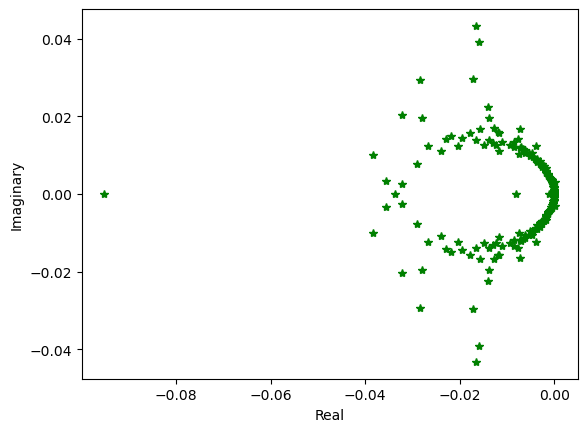

In [58]:
plt.plot(reals,imagin,'g*') #where I divided by 6/379
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [192]:
#Since 0.0001 seems like a reasonable cutoff point, we can now attempt to separate our modes into fast and slow modes

#We take the absolute value of Omega

#logEigen = np.log(Eigenvalues)
#omegaEigen = logEigen/delta_t
absoluteValOmega = np.abs(omegaEigen)



fast = np.zeros([165,1])
slow = np.zeros([165,1])
fastIndex = 0
slowIndex = 0
i = 0 

slowPositionInArray = 0


In [193]:
slow

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [194]:
for element in absoluteValOmega:
    if element > 0.0001: #We can note that using 0.001 instead gives us 7 slow modes instead of just 1
        fast[fastIndex] = element
        fastIndex = fastIndex + 1
        i = i+1
    else:
        slow[slowIndex] = element
        slowIndex = slowIndex + 1
        slowPositionInArray = i
        print(i)
        i = i+1

32


In [195]:
fast

array([[0.04636148],
       [0.04636148],
       [0.04222029],
       [0.04222029],
       [0.03431838],
       [0.03431838],
       [0.02638316],
       [0.02638316],
       [0.01813628],
       [0.01813628],
       [0.01308043],
       [0.01308043],
       [0.0030778 ],
       [0.0030778 ],
       [0.00457906],
       [0.00457906],
       [0.00391234],
       [0.00391234],
       [0.00179579],
       [0.00179579],
       [0.00084825],
       [0.00084825],
       [0.00056606],
       [0.00056606],
       [0.0011417 ],
       [0.0011417 ],
       [0.00147773],
       [0.00147773],
       [0.00188174],
       [0.00188174],
       [0.00231279],
       [0.00231279],
       [0.00015957],
       [0.00015957],
       [0.00252387],
       [0.00252387],
       [0.00288478],
       [0.00288478],
       [0.0035699 ],
       [0.0035699 ],
       [0.04076648],
       [0.04076648],
       [0.00332989],
       [0.00332989],
       [0.00416368],
       [0.00416368],
       [0.0068504 ],
       [0.006

In [196]:
slow

array([[7.82513311e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],


In [197]:
print(fastIndex, slowIndex)

164 1


In [198]:
i

165

In [199]:
#absoluteValOmega.reshape(165,1)

In [200]:
slowPositionInArray #Note that this prints the index of the slow mode in the omega array, therefore
#this is the 33rd element which is located at index 32

32

In [245]:
#Maybe reconstruct another frame of the foreground and background with a bigger cutoff to see how it 
#changes the data

import copy
lowCoef = np.zeros([165,1],dtype='complex')
#lowCoefMat = copy.deepcopy(coefMat) #Necessary to make a deep copy of the array to avoid changing the 
#lowCoef = np.zeros([165,1],dtype='complex')
lowCoef[32] = coefMat[32]
lowCoef[20] = coefMat[20]
lowCoef[21] = coefMat[21]
lowCoef[22] = coefMat[22]
lowCoef[23] = coefMat[23]
lowCoef[32] = coefMat[32]
lowCoef[33] = coefMat[33]
lowCoef[34] = coefMat[34]


In [246]:
#lowCoef.reshape(165,1)
#lowCoefMat
lowCoef

array([[   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [   0.        +0.00000000e+00j],
       [  67.14713323-7.13674182e+01j],
       [  67.14713323+7.13674182e+01j],
       [-110.38606892-1.12948207e+01j],
       [-110.38606892+1.12948207e+01j],
       [   0.        +0.00000000e+00j],


In [203]:
coefMat.reshape(165,1)

array([[  26.93751454-3.47119002e+01j],
       [  26.93751454+3.47119002e+01j],
       [  -7.67920239-1.58818159e+01j],
       [  -7.67920239+1.58818159e+01j],
       [ -34.2488321 +3.10250494e+01j],
       [ -34.2488321 -3.10250494e+01j],
       [  63.85415708+5.95359907e+01j],
       [  63.85415708-5.95359907e+01j],
       [ -27.91918927-1.56513463e+01j],
       [ -27.91918927+1.56513463e+01j],
       [ -28.97682961-5.19559741e+00j],
       [ -28.97682961+5.19559741e+00j],
       [   6.99191782-5.19001724e+00j],
       [   6.99191782+5.19001724e+00j],
       [ 104.76490392+5.38199872e+01j],
       [ 104.76490392-5.38199872e+01j],
       [ -14.87976641+9.52639747e+00j],
       [ -14.87976641-9.52639747e+00j],
       [  -3.10619783-4.13814758e+00j],
       [  -3.10619783+4.13814758e+00j],
       [  67.14713323-7.13674182e+01j],
       [  67.14713323+7.13674182e+01j],
       [-110.38606892-1.12948207e+01j],
       [-110.38606892+1.12948207e+01j],
       [  13.57769855-4.88672920e+01j],


In [204]:
#Testing to see if deep copy was successful
#fastCoefMat[32]

In [205]:
coefMat[32]

(1907.7465903040134+3.79506626946412e-11j)

In [247]:
#Now we may construct our fast eigendecomposition

slowDecomp = np.empty([165,379],dtype='complex')
#Zn.astype('complex')
array = np.empty([165,1],dtype='complex')
#arr.astype('complex')

for n in range(379):
    for m in range(165):
        #print(V[:,m])
        array = array+(V[:,[m]]*lowCoef[m]*(W[m])**(n+1))
    slowDecomp[:,[n]]= array
    #print(arr)
    array = np.empty([165,1])

print(slowDecomp)

[[ -13.03094023-3.68172159e-12j  -13.5359087 -3.76187970e-12j
   -13.98468769-3.82849308e-12j ...   -9.09618095-1.24456001e-12j
    -9.05231887-1.22746258e-12j   -9.00669235-1.21014310e-12j]
 [-131.36354337-4.22772928e-13j -130.79651263-4.20996571e-13j
  -130.23010194-4.20996571e-13j ... -111.73107835-2.17159624e-12j
  -111.64858681-2.19735341e-12j -111.567152  -2.22266650e-12j]
 [  56.13309974+4.44799753e-12j   56.37834728+4.35385061e-12j
    56.61930135+4.25437463e-12j ...   76.26413628+3.64552832e-12j
    76.3273938 +3.64508423e-12j   76.38738796+3.64286379e-12j]
 ...
 [-108.99997144-5.08038056e-12j -108.91486777-5.08304510e-12j
  -108.80916241-5.08570963e-12j ...  -49.48130708+1.52533541e-12j
   -49.42171474+1.52777790e-12j  -49.36220229+1.52922119e-12j]
 [   6.47828348+2.15844009e-12j    6.05316596+1.89276372e-12j
     5.65557258+1.63258296e-12j ...   20.81812881+1.34880995e-12j
    20.87623105+1.32194256e-12j   20.93547443+1.29563027e-12j]
 [-169.63155656-8.72546480e-12j -169.399

In [248]:
#Now we can construct our slow Eigen decomposition matrix from Zn and fast eigen decomp

fastDecomp = np.subtract(Zn,slowDecomp)
fastDecomp

array([[   3.24570696+8.18190613e-12j,    8.0924654 +9.18621988e-12j,
          12.92000031+8.65409810e-12j, ...,
           4.1006243 +5.00865719e-10j,  -20.67261059+3.94717081e-10j,
         -45.23847154+2.71005605e-10j],
       [ -16.41547458-2.26579391e-12j,   -7.533704  -6.19283093e-12j,
           1.09158885-7.72612013e-12j, ...,
        -175.07211215-3.46312126e-10j, -194.1755656 -5.60992829e-10j,
        -206.3359438 -7.59355923e-10j],
       [ -36.41947726-2.16607256e-12j,  -27.19684618+1.88037929e-12j,
         -25.49056829+1.47371224e-12j, ...,
          80.66275924+5.86985357e-10j,   67.61686688+5.90028695e-10j,
          51.68190468+5.70624662e-10j],
       ...,
       [  22.51843763+6.38413135e-12j,   26.47686261+4.80333612e-12j,
          30.01860116+1.23144413e-12j, ...,
        -134.48164221-1.03690954e-09j, -109.80981476-1.02868258e-09j,
         -80.37003809-9.81098442e-10j],
       [   3.51244501-5.14344846e-12j,    9.74029477-3.32260576e-12j,
          12.12300146-

In [181]:
#absSlow = np.abs(slowDecomp)
absSlow = np.abs(fastDecomp)

In [182]:
absSlow

array([[  0.76225655,   3.57507458,   7.94937387, ...,   2.49709054,
         22.23598487,  46.75992008],
       [ 16.48440828,   7.10048822,   2.02636611, ..., 177.77662217,
        196.85146123, 208.98425515],
       [ 57.95816446,  48.45190312,  46.46630741, ...,  92.42852497,
         79.47776299,  63.63465207],
       ...,
       [ 15.64368362,  11.63516059,   8.02270498, ..., 125.13945505,
        100.4371038 ,  70.96686885],
       [ 11.29100841,   5.47775947,   3.48213466, ...,   7.12068168,
         14.68050092,  36.56029515],
       [  1.14605887,   2.6794014 ,   1.81074897, ...,   3.19378048,
         26.64997613,  55.78113701]])

In [183]:
largeAbsSlow = np.zeros([518400,379])

for i in range(379):
    for j in range(165):
        largeAbsSlow[j][i] = absSlow[j][i]
largeAbsSlow

array([[  0.76225655,   3.57507458,   7.94937387, ...,   2.49709054,
         22.23598487,  46.75992008],
       [ 16.48440828,   7.10048822,   2.02636611, ..., 177.77662217,
        196.85146123, 208.98425515],
       [ 57.95816446,  48.45190312,  46.46630741, ...,  92.42852497,
         79.47776299,  63.63465207],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [184]:
Sparse = np.subtract(dataMat,largeAbsSlow)

In [185]:
Sparse

array([[  16.57107679,   14.75825875,   10.38395946, ...,   22.50290946,
           2.76401513,  -21.75992008],
       [   0.84892505,   11.23284511,   16.30696722, ..., -152.77662217,
        -171.85146123, -183.98425515],
       [ -40.62483112,  -30.11856978,  -28.13297408, ...,  -66.42852497,
         -53.47776299,  -37.63465207],
       ...,
       [ 167.66666667,  167.66666667,  167.66666667, ...,  163.66666667,
         163.66666667,  163.66666667],
       [ 164.66666667,  164.66666667,  164.66666667, ...,  163.66666667,
         163.66666667,  163.66666667],
       [ 163.66666667,  162.66666667,  162.66666667, ...,  163.66666667,
         163.66666667,  163.66666667]])

In [186]:
R = np.zeros([518400,379],dtype='float')

In [187]:
for j in range(379):
    for l in range(165):
        if Sparse[l][j] < 0.00:
            R[l][j] = Sparse[l][j]
            
R

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  -21.75992008],
       [   0.        ,    0.        ,    0.        , ..., -152.77662217,
        -171.85146123, -183.98425515],
       [ -40.62483112,  -30.11856978,  -28.13297408, ...,  -66.42852497,
         -53.47776299,  -37.63465207],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [188]:
newLowrank = np.add(R,largeAbsSlow)

In [189]:
newLowrank


array([[ 0.76225655,  3.57507458,  7.94937387, ...,  2.49709054,
        22.23598487, 25.        ],
       [16.48440828,  7.10048822,  2.02636611, ..., 25.        ,
        25.        , 25.        ],
       [17.33333333, 18.33333333, 18.33333333, ..., 26.        ,
        26.        , 26.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [190]:
newSparse = np.subtract(Sparse,R)
newSparse

array([[ 16.57107679,  14.75825875,  10.38395946, ...,  22.50290946,
          2.76401513,   0.        ],
       [  0.84892505,  11.23284511,  16.30696722, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [167.66666667, 167.66666667, 167.66666667, ..., 163.66666667,
        163.66666667, 163.66666667],
       [164.66666667, 164.66666667, 164.66666667, ..., 163.66666667,
        163.66666667, 163.66666667],
       [163.66666667, 162.66666667, 162.66666667, ..., 163.66666667,
        163.66666667, 163.66666667]])

In [191]:
ReconstructedVideo = np.add(newLowrank,newSparse)
#ReconstructedVideo[0:165,0:380]
ReconstructedVideo

array([[ 17.33333333,  18.33333333,  18.33333333, ...,  25.        ,
         25.        ,  25.        ],
       [ 17.33333333,  18.33333333,  18.33333333, ...,  25.        ,
         25.        ,  25.        ],
       [ 17.33333333,  18.33333333,  18.33333333, ...,  26.        ,
         26.        ,  26.        ],
       ...,
       [167.66666667, 167.66666667, 167.66666667, ..., 163.66666667,
        163.66666667, 163.66666667],
       [164.66666667, 164.66666667, 164.66666667, ..., 163.66666667,
        163.66666667, 163.66666667],
       [163.66666667, 162.66666667, 162.66666667, ..., 163.66666667,
        163.66666667, 163.66666667]])

In [419]:
#newFastDecomp = np.subtract(Zn,absSlow)

In [420]:
#newFastDecomp 

In [421]:
#R = np.zeros([165,379],dtype='float')

In [422]:
#for j in range(379):
#    for l in range(165):
#        if newFastDecomp[l][j] < 0.00:
#            R[l][j] = newFastDecomp[l][j]

In [423]:
#R

In [424]:
#newSlow = np.add(R,absSlow)

In [425]:
#newSlow

In [426]:
#finalFast = np.subtract(newFastDecomp,R)

In [427]:
#finalFast


In [428]:
#newZn = np.add(newSlow,finalFast)

In [429]:
#newZn

In [281]:
#newVideo = np.reshape(ReconstructedVideo,(540, 960, 379))
#newVideo.shape



In [119]:
#intVideo = newVideo.astype('uint8')
#image = cv.imread("im",intVideo[54][0:541][0:961])
#grey_im = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#cv.imshow(grey_im)
#cv.waitKey(10)

TypeError: Argument 'flags' is required to be an integer

In [126]:
#image1 = intVideo[0]

In [127]:
#image1.shape

(960, 379)

In [241]:
#background = np.matmul(u,slowDecomp)

#background
#absBack = np.abs(background)

#sparse = np.subtract(dataMat,absBack)

In [242]:
#background

array([[ 0.40796548,  0.58126387,  0.55203102, ...,  0.02411036,
        -0.10476897, -0.69276625],
       [-5.83655878, -2.68929477, -2.56084018, ..., -3.50747844,
        -3.43529789, -3.63468067],
       [-0.03836224, -0.01761235, -0.00592619, ...,  0.56573566,
         0.60266376,  0.55463103],
       ...,
       [-1.92612025, -1.54480406, -0.97257311, ..., -2.86388039,
        -2.15561471, -2.80175355],
       [-1.86199188, -1.48550536, -1.53759902, ...,  0.74779135,
        -0.30892645, -0.21646935],
       [ 3.14996974,  3.36174414,  3.5350502 , ..., -3.33555187,
        -3.11478645, -2.97178999]])

In [243]:
#sparse

array([[ 16.92536785,  17.75206947,  17.78130231, ...,  24.97588964,
         24.89523103,  24.30723375],
       [ 11.49677455,  15.64403856,  15.77249316, ...,  21.49252156,
         21.56470211,  21.36531933],
       [ 17.2949711 ,  18.31572098,  18.32740715, ...,  25.43426434,
         25.39733624,  25.44536897],
       ...,
       [165.74054642, 166.12186261, 166.69409355, ..., 160.80278627,
        161.51105196, 160.86491312],
       [162.80467478, 163.18116131, 163.12906765, ..., 162.91887532,
        163.35774021, 163.45019732],
       [160.51669692, 159.30492253, 159.13161647, ..., 160.3311148 ,
        160.55188022, 160.69487668]])

In [249]:
absBackground = np.abs(slowDecomp)

sparse = np.subtract(data_reduced,absBackground)
sparse


array([[ -30.03380399,  -23.28696949,  -23.32611245, ...,  -29.67212352,
         -30.06909326,  -19.19881355],
       [-254.86992529, -277.30145518, -276.99422658, ..., -259.28794979,
        -258.65014283, -247.13874064],
       [ -52.36464534,  -35.07031915,  -35.70952732, ...,   -9.18787242,
          -8.36960071,  -17.6003889 ],
       ...,
       [-201.10350589, -194.73460013, -194.19083865, ...,  -96.64140308,
         -95.88630192, -103.22163072],
       [   7.3960853 ,    5.00487354,    5.49460456, ...,    5.5744295 ,
           5.82960833,   14.31554409],
       [-317.06496876, -296.22355323, -295.97500771, ..., -199.23685736,
        -199.28229461, -205.88189716]])

In [250]:
R = np.zeros([165,379],dtype='float')
for j in range(379):
    for l in range(165):
        if sparse[l][j] < 0.00:
            R[l][j] = sparse[l][j]
            
R

array([[ -30.03380399,  -23.28696949,  -23.32611245, ...,  -29.67212352,
         -30.06909326,  -19.19881355],
       [-254.86992529, -277.30145518, -276.99422658, ..., -259.28794979,
        -258.65014283, -247.13874064],
       [ -52.36464534,  -35.07031915,  -35.70952732, ...,   -9.18787242,
          -8.36960071,  -17.6003889 ],
       ...,
       [-201.10350589, -194.73460013, -194.19083865, ...,  -96.64140308,
         -95.88630192, -103.22163072],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-317.06496876, -296.22355323, -295.97500771, ..., -199.23685736,
        -199.28229461, -205.88189716]])

In [251]:
sparse = np.subtract(sparse,R)
sparse

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.3960853 ,  5.00487354,  5.49460456, ...,  5.5744295 ,
         5.82960833, 14.31554409],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [252]:
foreground = np.matmul(u,sparse)
foreground = np.zeros([518400,379],dtype='float')
for j in range(379):
    for l in range(165):
        foreground[l][j] = sparse[l][j]
            
foreground

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [253]:
from PIL import Image as im

In [254]:
image2 = foreground[:,[39]]
image2.shape
image2 = image2.reshape(540,960)
image2 = image2.astype('uint8')

In [255]:
data1 = im.fromarray(image2)

In [256]:
data1.save("test4.png")

In [445]:
#image = Image.fromarray(newVideo[0])

In [1]:
#image.save('testing.jpeg')